In [1]:
#   __  __                   _                   _           
#  |  \/  |                 | |                 (_)          
#  | \  / | __ _  __ _  ___ | |_ _ __ ___  _ __  _  ___ ___  
#  | |\/| |/ _` |/ _` |/ _ \| __| '__/ _ \| '_ \| |/ __/ _ \ 
#  | |  | | (_| | (_| | (_) | |_| | | (_) | | | | | (_| (_) |
#  |_|  |_|\__,_|\__, |\___/ \__|_|  \___/|_| |_|_|\___\___/ 
#                 __/ |                                      
#                |___/                                       
# ─────────────────────────────────────────────────────────────────────────────
#                              
# Author      : Dilan Castañeda                                             
# Created On  : October 05, 2024                                           
# Last Update : October 05, 2024                                         
# Version     : 1.0.0       

# Simple Linear Regression
# Interactive reading 3

### <font color='blue'> Name: Dilan Gonzalez Castaneda</font>
### <font color='blue'> ID: A00831905</font>

Welcome to the third week of this course. This time we will focus on linear regression, but to achieve this we will continue using the functions we learned last weeks. Each week we will add more lines of code to make our data analysis more complete. 

#### Development of the activity

For this activity we will include a dataset related to the Boston Housing data which was collected in 1978 and each of te 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.

The dataset is available in the `sklean` python module. 
Number of instances: 506
Number of Attributes: 13 numeric/categorical predictive
Missing values: None

This is the list of variables we will be working with:
- `CRIM` per capita crime rate by town
- `ZN` proportion of residential land zoned for lots over 25,000 sq.ft.
- `INDUS` proportion of non-retail business acres per town
- `CHAS` Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- `NOX`  nitric oxides concentration (parts per 10 million)
- `RM` average number of rooms per dwelling
- `AGE` proportion of owner-occupied units built prior to 1940
- `DIS` weighted distances to five Boston employment centres
- `RAD`  index of accessibility to radial highways
- `TAX` full-value property-tax rate per 10000
- `PTRATIO` pupil-teacher ratio by town
- `B`  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- `LSTAT` % lower status of the population
- `MEDV`  Median value of owner-occupied homes in $1000's

Develop the following points in a Jupyter Notebook, trying, as much as possible, that each point is worked in a different cell. Comments in the code are always welcome, as they help a reader to understand more easily what the creator of the file programmed.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
# Dataset is not in sklearn, so we need to load it from a csv file https://github.com/selva86/datasets/blob/master/BostonHousing.csv
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
data = pd.read_csv(url)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Print the following information: shape, column names, column data type, missing values, descriptive statistics

<details>
    <summary>If you have problems, click here to show the solution</summary>
    data.shape<br>
    data.info()<br>
    data.describe()<br>
</details>


In [4]:
data.shape

(506, 14)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Do exploratory analysis of data visualization. Make at least one scatter plot between the output variable Price with each of the variables we have in the dataset. Which one do you consider has the highest positive linear relationship with the output? Try the exercise and then look at the solution.

<details>
    <summary>If you have problems, click here to show the solution</summary>
    import seaborn as sns<br>
    sns.pairplot(data=data,y_vars=['PRICE'], x_vars=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])<br>
</details>


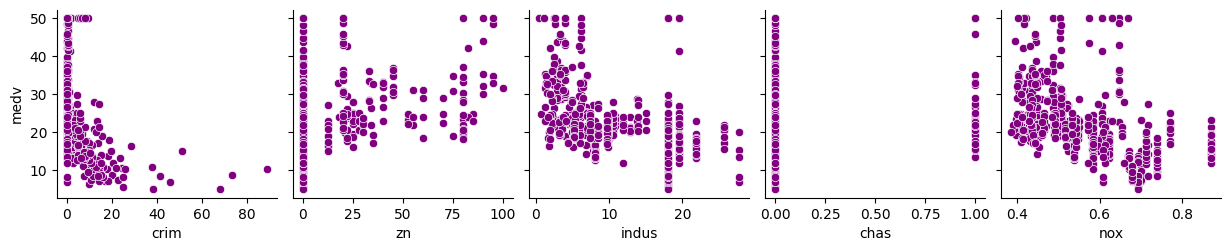

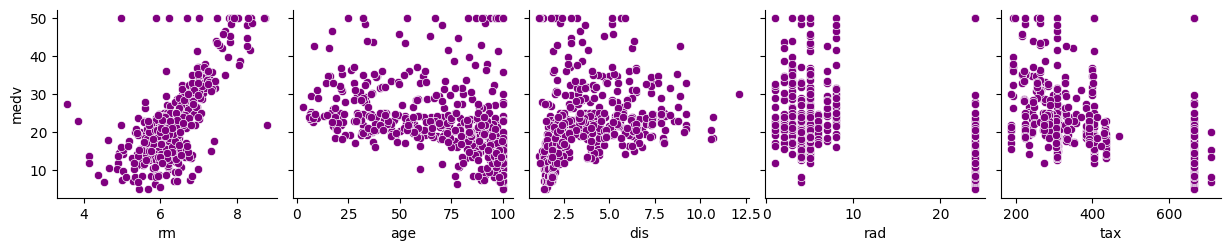

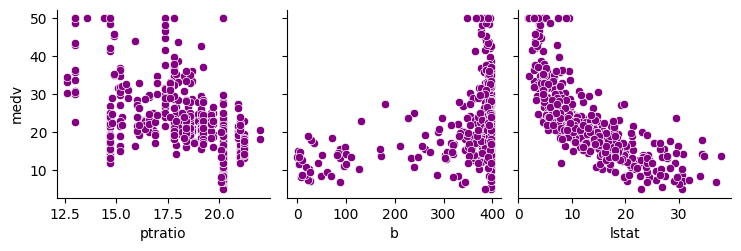

In [7]:
vars = data.columns
vars = vars.drop('medv')
n = 5
for i in range(0, len(vars), n):
    sns.pairplot(data=data, y_vars=['medv'], x_vars=vars[i:i+n], plot_kws={'color': 'purple'})
    plt.show()

Import `statsmodels.api as sm`. Then define as `x` the variable `RM` and as `y` the variable `PRICE`. Then run the function as it is in the cell.

<details>
    <summary>If you have problems, click here to show the solution</summary>
    import statsmodels.api as sm<br>
    x = data.RM<br>
    y = data.PRICE<br>
    X = sm.add_constant(x)<br>
    model = sm.OLS(y,X)<br>
    results = model.fit()<br>
    results.summary()<br>
</details>

In [8]:
x = data['rm']
y = data['medv']
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           2.49e-74
Time:                        19:49:15   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
rm             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We observed an R-squared of 0.484, indicating that 48.4% of the variability of the dependent variable `PRICE` is explained by the independent variable `MR`. We also observe that B0 is -34.67 and B1 is 9.10. The p-values of these coefficients are significant when recorded as 0.000. We also note the 95% confidence interval values for these coefficients. 

In the following cells print the p-values with the function `pvalues` in the variable `results`. It also prints the Residual Standard Error with the `scale**.5` function on the variable `results`.

<details>
    <summary>If you have problems, click here to show the solution</summary>
    print(results.pvalues)<br>
    print(results.scale**.5)<br>
</details>

In [10]:
results.pvalues

const    6.950229e-34
rm       2.487229e-74
dtype: float64

In [11]:
results.scale**.5

6.616159749715358

Having the values of B0 and B1 reconstruct the equation y = mx + b. Plot again the scatterplot between x and y but add the correlation line. 

<details>
    <summary>If you have problems, click here to show the solution</summary>
    plt.scatter(data.RM, data.PRICE)<br>
    plt.xlabel("Average number of rooms per dwelling (RM)")<br>
    plt.ylabel("Housing Price")<br>
    plt.title("Relationship between RM and Price")<br>
    yHat = -34.67 + (9.10*x)<br>
    plt.plot(x, yHat, c = "r", linewidth = 3, alpha = 0.75)<br>
    plt.grid()<br>
    plt.show()<br>
</details>

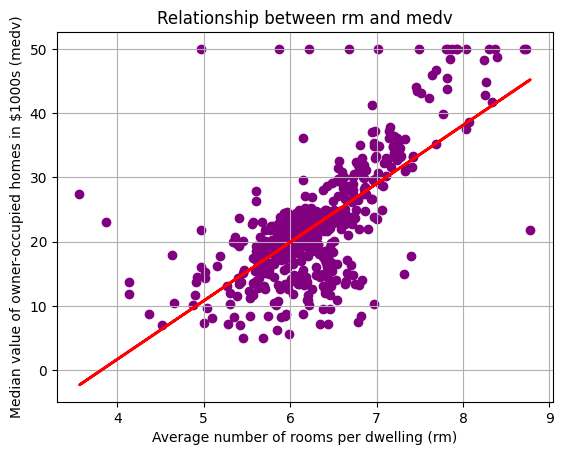

In [12]:
plt.scatter(data['rm'],data['medv'], color='purple')
plt.xlabel('Average number of rooms per dwelling (rm)')
plt.ylabel('Median value of owner-occupied homes in $1000s (medv)')
plt.title('Relationship between rm and medv')
yhat = -34.67 + 9.10 * data['rm']
plt.plot(data['rm'], yhat, lw=2, color='red')
plt.grid()
plt.show()

We can also use `seaborn` `regplot` for the scatterplot above. This provides automatic linear regression fits.

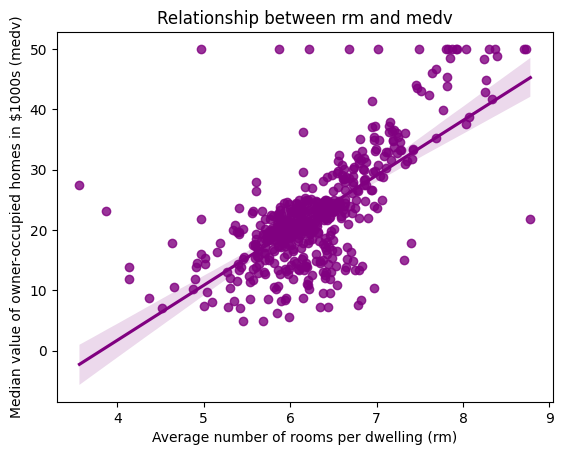

In [16]:
sns.regplot(x='rm', y='medv', data=data, color='purple', fit_reg=True)
plt.xlabel('Average number of rooms per dwelling (rm)')
plt.ylabel('Median value of owner-occupied homes in $1000s (medv)')
plt.title('Relationship between rm and medv')
plt.show()